In [56]:
%matplotlib inline

import shm
import numpy
import networkx
import matplotlib
import seaborn as sns
import pandas as pd
import pickle
import pymc3 as pm

In [6]:
import matplotlib.pyplot as plt
from shm.models.hlm import HLM

In [40]:
trace_dir = "../results/simple_model_trace"
readout_file = "../data_raw/easy_simulated_data/simulated_data.tsv"
graph_file = "../data_raw/easy_simulated_data/graph.tsv"
data_file = "../data_raw/easy_simulated_data/data.pickle"

In [41]:
def _read_graph(infile, data):    
    genes = numpy.unique(data["gene"].values)
    G = networkx.read_edgelist(
      infile,
      delimiter="\t",
      data=(('weight', float),),
      nodetype=str)
    G = G.subgraph(numpy.sort(genes))
    data = data[data.gene.isin(numpy.sort(G.nodes()))]
    return G, data

In [44]:
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [54]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


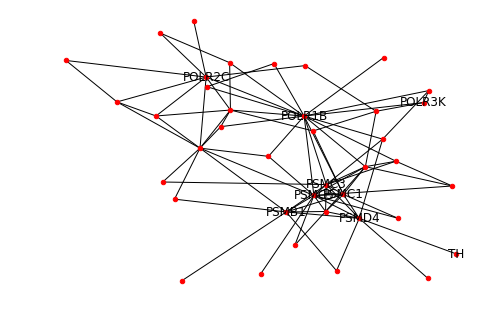

In [51]:
networkx.draw(graph, labels={e: e for e in data['essential_genes']}, node_size=20)

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


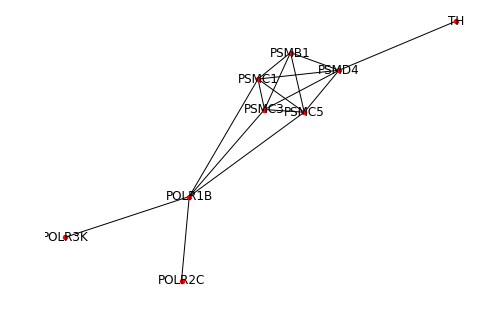

In [52]:
networkx.draw(graph.subgraph(data['essential_genes']), with_labels=True, node_size=20)

In [57]:
with HLM(readout) as model:
    trace = pm.load_trace(trace_dir, model = model.model)

In [60]:
import sys

In [62]:
sys.getsizeof(trace)

56

array([-0.98207067, -1.47539779, -1.17908265, ..., -1.01963324,
       -0.92888171, -1.44973651])